<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/1280px-Standard_deviation_diagram_micro.svg.png)

Before we draw random numbers from a Normal distribution (also known as a Gaussian distribution), need to know what Normal distribution is. With the characteristic shape shown in the plots above (from Wikipedia), the Normal distribution is defined by two parameters. The mean μ and the standard deviation σ. The mean decides the centre’s location, and the standard deviation decides the chubbiness. A feature of the Normal distribution (as indicated in the image above) is that 68% of the points lie between μ ± σ.

In [1]:
#to draw normal rnadom samples:
np.random.normal(loc=5, scale=2, size=10) #loc is used to specify the mean and scale the standard deviation

array([5.78945954, 4.12252246, 5.75164949, 4.92841499, 4.40390784,
       3.82967952, 4.84979457, 4.29649373, 4.27576376, 5.84798743])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

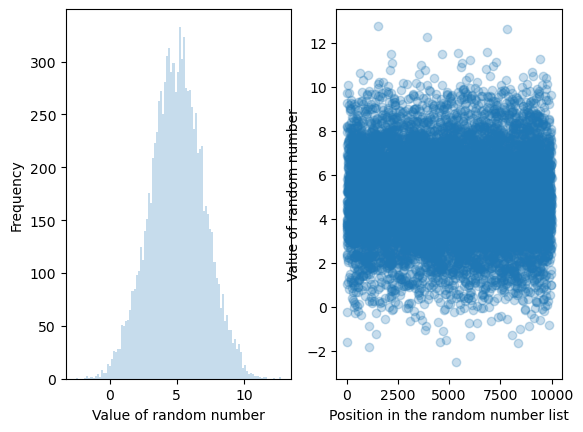

In [3]:
#Plot the data in histogram and scatterplot
from matplotlib import pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
#Check if the Normal random numbers given satisfy the 68% condition

n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.10%


## 1 Brownian Motion in 1D

### 1.1 The scenario

Simulate a simple random walk in 1D. The scenario is such that a particle is restricted to moving in 1D (i.e. only along a line). It moves in steps, either one unit to the left or one to the right. The choice of left or right is selected randomly. Let’s take the probability of going right as  $p$, and going left is $q ( = 1 - p)$.


### 1.2 The simulation

In [5]:
#the above information can be encapsulated in a function as such:

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x


In [6]:
#to not have to keep typing np.random
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

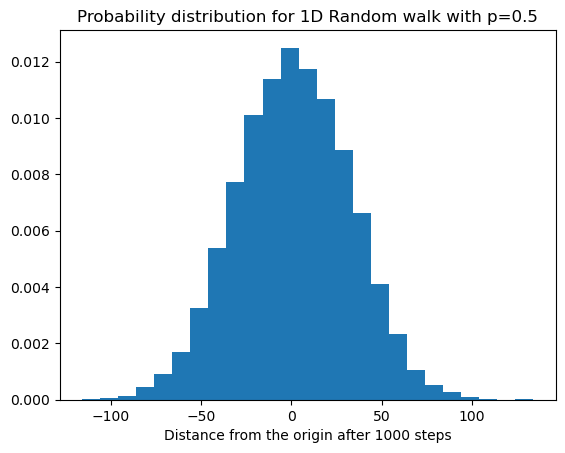

In [7]:
#every time I run the function, I will get a different value
#to see if there is a pattern, I will repeat an experiment of 1000 steps 10000 times

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Distribution looks familiar since p=.5 is symmetrical about the starting position. If I increase the probability p to 0.6, the curve should shift to the right.

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

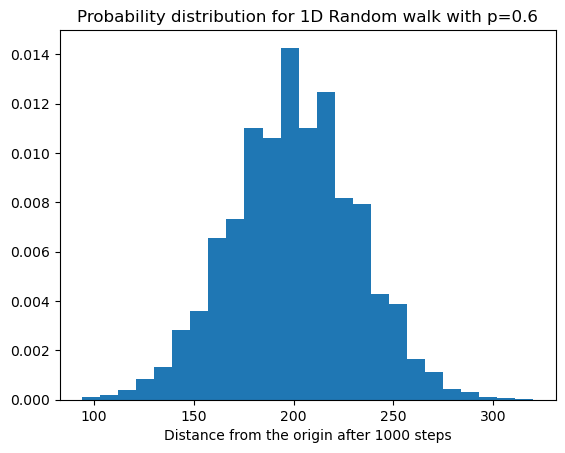

In [8]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

A theoretical analysis of 1D random walks predicts that the distribution of positions should have a mean of $N(p-q)$ and a standard deviation of $√4Npq$ (where $N$ is the total number of steps). The distribution is actually Binomial, but since there is a large number of steps, it approximates a Gaussian. Overlay a Normal distribution over our previous plots to see how well our simulation agrees with the theory.

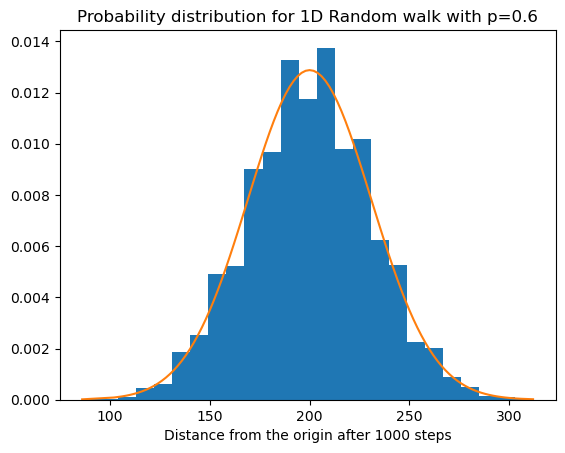

In [11]:
#normal distribution function
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

#histogram
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

#to overlay the normal curve on histogram
prob_right = p
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

Techniques above that involve random numbers are called **Monte Carlo** methods. 

## 2 Estimating \(\pi\)

### 2.1 The method

Consider a circle inscribed on a square surface, as shown above. Let’s take the radius of the circle to be 1. Then, if we throw a large number ($Ntotal$) of grains of sand **randomly** onto this surface, the number of grains landing on the green, the circular area will be related to the number on the total area by:


$Ngreen/Ntotal$ ≈ Area of green region/Area of square

We know the formulae for the areas! So, 

$π ≈ 4(Ngreen/Ntotal)$


We can simulate this experiment by randomly ‘creating’ points (to represent where a grain of sand will land) by using NumPy’s PRNG. We can then decide if this grain of sand is inside or outside to get $Ngreen$ and to get an estimate for $π$!

### 2.2 A poor but intuitive solution

In [12]:
#poor but intuitive solution by throwing one grain at a time
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13916

Solution is slow because we are drawing out the random number, one at a time

### 2.3 A better solution

In [13]:
#better solution that generate multiple random numbers at once
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)


3.141072

### 2.4 A smarter solution

In [14]:
#algorithm can still be improved
#if we limit experiment to first quadrant, equation remains the same
#but range for x and y becomes [0,1). So statistics have improved drastically.
#We can now use the faster, simpler rand()

N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.142224

## Exercise 1 :  Vital Stats of Random π

In [39]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * (N_green / n)

repeats = 100
pi_list = [estimate_pi(n=10000) for i in range(repeats)]
mean = sum(pi_list)/repeats
standard_deviation = np.sqrt(sum((pi_list - mean)**2)/repeats)

0.47118573832407107
0.1623842356880741
0.05619110249852732
0.018068319678376292
0.005003500518636958


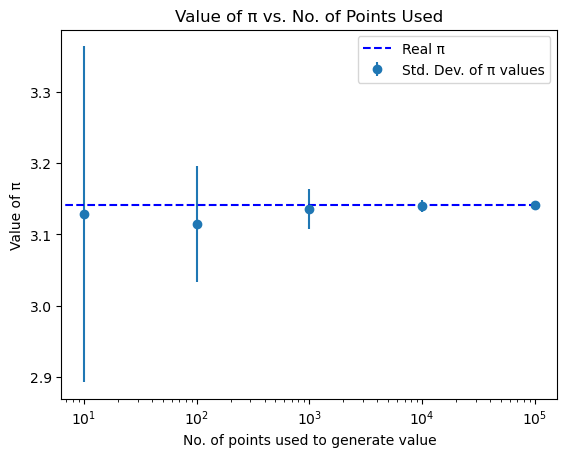

In [66]:
plt.style.use('default')
means = []
standard_deviations = []
for i in range(1,6):
    pi_list = [estimate_pi(10**i) for _ in range(repeats)]
    mean = sum(pi_list)/repeats
    means.append(mean)
    standard_deviation = np.sqrt(sum((pi_list - mean)**2)/repeats)
    print(standard_deviation)
    standard_deviations.append(standard_deviation)

yerror = np.array(standard_deviations) /2
x = [10**1, 10**2, 10**3, 10**4, 10**5]

plt.errorbar(x, means, yerr= yerror, fmt='o', label='Std. Dev. of π values')
plt.xscale('log')
plt.hlines(np.pi, 0, 10**5, color = 'blue', linestyle = 'dashed', label = 'Real π')
plt.legend(loc='upper right')
plt.title('Value of π vs. No. of Points Used')
plt.ylabel('Value of π')
plt.xlabel('No. of points used to generate value')
plt.show()
    

In [61]:
? plt.ticks



Object ` plt.ticks` not found.
